In [1]:
import sys
if '..' not in sys.path:
    sys.path.append('..')

In [9]:
import pandas as pd
from mturk.gformtools import visualize
from mturk.gformtools import unpack_json
%matplotlib inline
import seaborn as sns

## Look at the practice documents

In [9]:
results_path = '../output/mturk/student2-practice-results/results.csv'

In [26]:
df = pd.read_csv(results_path)
df[['Timestamp', 'Document', 'f1_conll']]

,Timestamp,Document,f1_conll
0,2019/03/22 12:27:22 am EET,student2-practice-question-000.html,100.000000
1,2019/03/26 2:11:30 am EET,student2-practice-question-001.html,100.000000
2,2019/03/26 2:11:39 am EET,student2-practice-question-002.html,100.000000
3,2019/03/26 2:11:51 am EET,student2-practice-question-003.html,87.340000
4,2019/03/26 2:12:01 am EET,student2-practice-question-004.html,96.733333
5,2019/03/26 2:12:11 am EET,student2-practice-question-005.html,88.813333
6,2019/03/26 2:12:20 am EET,student2-practice-question-006.html,100.000000
7,2019/03/26 2:12:31 am EET,student2-practice-question-007.html,98.066667
8,2019/04/01 10:09:32 am EET,student2-practice-question-010.html,88.116667
9,2019/04/01 10:13:30 am EET,student2-practice-question-008.html,NaN


In [29]:
ann_path = '../output/mturk/student2-practice-results/student2-practice-question-003.html.ann_conll'
gold_path = '../output/mturk/student2-practice-results/student2-practice-question-003.html.gold_conll'
visualize(gold_path, ann_path)

Writing /Users/cumeo/Projects/spinoza/ulm-4/EvEn/notebooks/temp/output/error_analysis.html


^^^ The results seem low because document 3 is shorter than usual. There's only one recall error.

In [33]:
ann_path = '../output/mturk/student2-practice-results/student2-practice-question-005.html.ann_conll'
gold_path = '../output/mturk/student2-practice-results/student2-practice-question-005.html.gold_conll'
visualize(gold_path, ann_path)

Writing /Users/cumeo/Projects/spinoza/ulm-4/EvEn/notebooks/temp/output/error_analysis.html


^^^ Two recall errors happened in quotations which require complex inference. One case of possessive that I think the gold standard gets it wrong.

In [34]:
ann_path = '../output/mturk/student2-practice-results/student2-practice-question-010.html.ann_conll'
gold_path = '../output/mturk/student2-practice-results/student2-practice-question-010.html.gold_conll'
visualize(gold_path, ann_path)

Writing /Users/cumeo/Projects/spinoza/ulm-4/EvEn/notebooks/temp/output/error_analysis.html


^^^ There're 6 recall errors in this telephone conversation.

- Gold standard is wrong: "A: \[you\]\_1 said people are not / A: the red meat is suffering \[I\]\_1 guess"
- Gold standard is wrong: "B: \[I\]\_1 know \[...\] A: and \[I\]\_1 know I can see the attitude %ah well"
- Gold standard is wrong: "\[they\]\_1 take \[the\]\_1 good and the bad all the". It's just wrong.
- Gold standard is wrong: "and \[it\] 's about getting help with housing and food stamps and everything". "It" is linked with "they" some sentences prior but it should have been generic "it".
- Gold standard is wrong: "I said oh \[I\]\_1 'm sorry / she says \[I\]\_1 really thought United States that you do n't die you know". The two marked "I" shouldn't have been linked together.
- Missed one link at the end of the document

In [35]:
ann_path = '../output/mturk/student2-practice-results/student2-practice-question-011.html.ann_conll'
gold_path = '../output/mturk/student2-practice-results/student2-practice-question-011.html.gold_conll'
visualize(gold_path, ann_path)

Writing /Users/cumeo/Projects/spinoza/ulm-4/EvEn/notebooks/temp/output/error_analysis.html


^^^ 3 recall errors, 2 from gold standard, 1 very hard case.

- Gold standard seems wrong: "We enjoy \[it\] . [...] \[It\]'s a nice place" --> the first "it" should be generic
- 2 other mistakes

## Look at annotation speed

We'll search for any abnormally long event by computing quantile-99 and then we'll measure the average time needed to complete one document.

In [4]:
anns_path = '../data/annotations/Student2-practice.csv'
anns1 = pd.read_csv(anns_path)
anns2 = anns1.Annotations.apply(unpack_json)
anns = pd.concat([anns1, anns2], axis=1)

Failed to parse the string: 'https://docs.google.com/document/d/1pRE_bobMDHpj3SCggvX_o_Jo0QCHzQqvTBu7uCUi8oE/edit?usp=sharing...'
Traceback (most recent call last):
  File "../mturk/gformtools.py", line 12, in unpack_json
    json_obj = json.loads(json_str)
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/json/__init__.py", line 354, in loads
    return _default_decoder.decode(s)
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/json/decoder.py", line 339, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/json/decoder.py", line 357, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)
Failed to parse the string: 'https://docs.google.com/document/d/1ECavjpp-Z65hu9ymT8QajUfypDiiXbOfeOugAqLXk

In [7]:
event_durations_data = []
for _, row in anns.iterrows():
    if isinstance(row['events'], str):
        event_start_timestamps = [0] + [int(evt.split(':')[0]) for evt in row['events'].split(';')]
        event_durations = [end-start for start, end in zip(event_start_timestamps[:-1], event_start_timestamps[1:])]
        event_durations_data.extend({'workerId': row['workerId'], 
                                     'conll_file': row['conll_file'],
                                     'event_duration_sec': d / 1000} 
                                    for d in event_durations if d > 0)

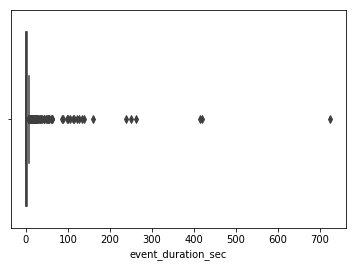

In [10]:
event_durations = pd.DataFrame(event_durations_data)
_ = sns.boxplot(event_durations.event_duration_sec)

In [12]:
q99 = event_durations.event_duration_sec.quantile(0.99)
print('Quantile-99 = %.1f sec' %q99)

Quantile 99 = 60.9 sec


In [13]:
doc_completion_time = event_durations.groupby(['conll_file']).sum()
doc_completion_time['doc_completion_min'] = doc_completion_time['event_duration_sec'] / 60
doc_completion_time = doc_completion_time.drop(columns='event_duration_sec')

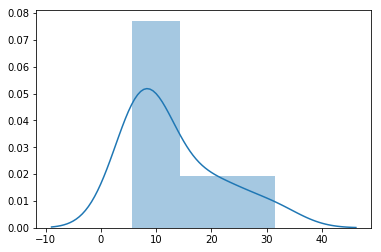

In [14]:
_ = sns.distplot(doc_completion_time)

In [15]:
doc_completion_time.mean()

doc_completion_min    13.052943
dtype: float64